In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(3)

In [2]:
Data = pd.read_csv('AMZN.csv',header=0, usecols=['Date',
'Close'],parse_dates=True,index_col='Date')

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-11-21 to 2018-11-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4529 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB


In [4]:
Data.head()

,Close
Date,
2000-11-21,24.2500
2000-11-22,25.1875
2000-11-24,28.9375
2000-11-27,28.0000
2000-11-28,25.0312


In [5]:
Data.describe()

,Close
count,4529.000000
mean,290.353723
std,407.211585
min,5.970000
25%,39.849998
50%,117.889999
75%,327.440002
max,2039.510010


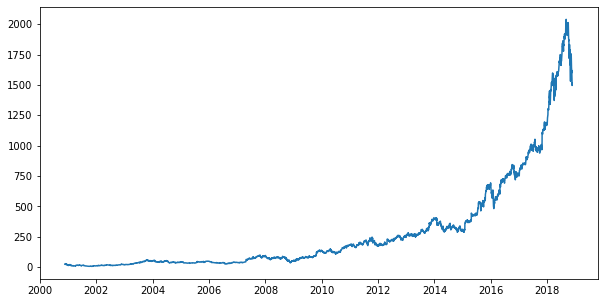

In [6]:
plt.figure(figsize=(10,5))
plt.plot(Data)
plt.show()

In [7]:
DataPCh = Data.pct_change()
LogReturns = np.log(1 + DataPCh) 

print(LogReturns.tail(10))

               Close
Date                
2018-11-08 -0.000330
2018-11-09 -0.024504
2018-11-12 -0.045140
2018-11-13 -0.003476
2018-11-14 -0.019913
2018-11-15  0.012696
2018-11-16 -0.016204
2018-11-19 -0.052251
2018-11-20 -0.011191
2018-11-21  0.014123


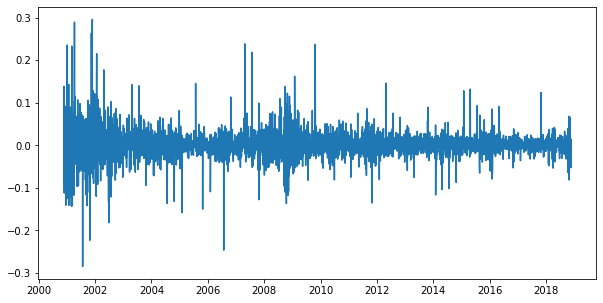

In [8]:
plt.figure(figsize=(10,5))
plt.plot(LogReturns)
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
DataScaled = scaler.fit_transform(Data)
TrainLen = int(len(DataScaled) * 0.70)
TestLen = len(DataScaled) - TrainLen
TrainData = DataScaled[0:TrainLen,:]
TestData = DataScaled[TrainLen:len(DataScaled),:]

print(len(TrainData), len(TestData))

3170 1359


In [10]:
def DatasetCreation(dataset, TimeStep=1):
    DataX, DataY = [], []
    for i in range(len(dataset)- TimeStep -1):
            a = dataset[i:(i+ TimeStep), 0]
            DataX.append(a)
            DataY.append(dataset[i + TimeStep, 0])
    return np.array(DataX), np.array(DataY)

In [11]:
TimeStep = 1
TrainX, TrainY = DatasetCreation(TrainData, TimeStep)
TestX, TestY = DatasetCreation(TestData, TimeStep)
TrainX = np.reshape(TrainX, (TrainX.shape[0], 1, TrainX.shape[1]))
TestX = np.reshape(TestX, (TestX.shape[0], 1, TestX.shape[1]))

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow import set_random_seed

set_random_seed(3)

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [13]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, TimeStep)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.fit(TrainX, TrainY, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
3168/3168 [==============================] - 10s 3ms/step - loss: 5.8626e-05 - accuracy: 3.1566e-04
Epoch 2/100
3168/3168 [==============================] - 9s 3ms/step - loss: 5.2479e-06 - accuracy: 3.1566e-04
Epoch 3/100
3168/3168 [==============================] - 9s 3ms/step - loss: 5.3309e-06 - accuracy: 3.1566e-04
Epoch 4/100
3168/3168 [==============================] - 10s 3ms/step - loss: 5.0572e-06 - accuracy: 3.1566e-04
Epoch 5/100
3168/3168 [==============================] - 10s 3ms/step - loss: 5.1836e-06 - accuracy: 3.1566e-04
Epoch 6/100
3168/3168 [==============================] - 10s 3ms/step - loss: 4.4430e-06 - accuracy: 3.1566e-04
Epoch 7/100
3168/3168 [==============================] - 10s 3ms/step - loss: 4.5396e-06 - accuracy: 3.1566e-04
Epoch 8/100
3168/3168 [==============================] - 10s 3ms/step - loss: 4.6573e-06 - accuracy: 3.1566e-04
Epoch 9/100
3168/3168 [==============================] - 10s 3ms/step - loss: 4.2579e-06 - accuracy: 3.15

3168/3168 [==============================] - 10s 3ms/step - loss: 2.8441e-06 - accuracy: 3.1566e-04
Epoch 72/100
3168/3168 [==============================] - 10s 3ms/step - loss: 2.8587e-06 - accuracy: 3.1566e-04
Epoch 73/100
3168/3168 [==============================] - 10s 3ms/step - loss: 2.8738e-06 - accuracy: 3.1566e-04
Epoch 74/100
3168/3168 [==============================] - 10s 3ms/step - loss: 2.9173e-06 - accuracy: 3.1566e-04
Epoch 75/100
3168/3168 [==============================] - 10s 3ms/step - loss: 2.9510e-06 - accuracy: 3.1566e-04
Epoch 76/100
3168/3168 [==============================] - 10s 3ms/step - loss: 2.8177e-06 - accuracy: 3.1566e-04
Epoch 77/100
3168/3168 [==============================] - 10s 3ms/step - loss: 3.0222e-06 - accuracy: 3.1566e-04
Epoch 78/100
3168/3168 [==============================] - 10s 3ms/step - loss: 2.9616e-06 - accuracy: 3.1566e-04
Epoch 79/100
3168/3168 [==============================] - 10s 3ms/step - loss: 3.0878e-06 - accuracy: 3.1566e

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [15]:
score = model.evaluate(TrainX, TrainY, verbose=0)

print('Keras Model Loss = ',score[0])
print('Keras Model Accuracy = ',score[1])

Keras Model Loss =  2.1099970504190774e-06
Keras Model Accuracy =  0.00031565656536258757


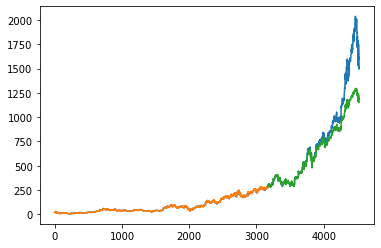

In [16]:
TrainPred = model.predict(TrainX)
TestPred = model.predict(TestX)

TrainPred = scaler.inverse_transform(TrainPred)
TrainY = scaler.inverse_transform([TrainY])
TestPred = scaler.inverse_transform(TestPred)
TestY = scaler.inverse_transform([TestY])

TrainPredictPlot = np.empty_like(DataScaled)
TrainPredictPlot[:, :] = np.nan
TrainPredictPlot[1:len(TrainPred)+1, :] = TrainPred

TestPredictPlot = np.empty_like(DataScaled)
TestPredictPlot[:, :] = np.nan
TestPredictPlot[len(TrainPred)+(1*2)+1:len(DataScaled)-1, :] = TestPred

plt.plot(scaler.inverse_transform(DataScaled))
plt.plot(TrainPredictPlot)
plt.plot(TestPredictPlot)
plt.show()